<a href="https://colab.research.google.com/github/Navaneethp0/Heart-Prediction/blob/main/Heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

In [96]:
data = pd.read_csv("/content/drive/MyDrive/heart_attack_prediction_dataset.csv")
data

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [97]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [99]:
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [100]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [101]:
data['Country'].unique()
data['Country'].value_counts()

Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64

In [102]:
data.value_counts()

Patient ID  Age  Sex     Cholesterol  Blood Pressure  Heart Rate  Diabetes  Family History  Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet       Previous Heart Problems  Medication Use  Stress Level  Sedentary Hours Per Day  Income  BMI        Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  Country        Continent      Hemisphere           Heart Attack Risk
AAA9246     61   Male    171          148/90          89          1         1               1        0        1                    8.123736                 Unhealthy  1                        0               9             8.453044                 108612  27.098445  626            3                                5                    New Zealand    Australia      Southern Hemisphere  0                    1
RPT9211     37   Male    394          133/90          70          0         0               1        0        1                    1.165282                 Average    1                   

In [103]:
le = LabelEncoder()
data['Sex']=le.fit_transform(data["Sex"])
data

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,1,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,0,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,1,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,1,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [104]:
data=data.drop(columns=["Hemisphere","Continent","Country","Patient ID"])
data



,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,1,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,1,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,0,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,1,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,1,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,94/76,61,1,1,1,0,1,...,1,1,8,10.806373,235420,19.655895,67,7,7,0
8759,28,0,120,157/102,73,1,0,0,1,0,...,0,0,8,3.833038,217881,23.993866,617,4,9,0
8760,47,1,250,161/75,105,0,1,1,1,1,...,1,0,5,2.375214,36998,35.406146,527,4,4,1
8761,36,1,178,119/67,60,1,0,1,0,0,...,1,1,5,0.029104,209943,27.294020,114,2,8,0


In [105]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data



,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
0,67,1,208,158/88,72,0,0,1,0,0,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,165/93,98,1,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,174/99,72,1,0,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,163/100,73,1,1,1,0,1,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,91/88,93,1,1,1,1,0,...,6,1.514821,160555,21.809144,231,1,5,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,94/76,61,1,1,1,0,1,...,8,10.806373,235420,19.655895,67,7,7,0,94,76
8759,28,0,120,157/102,73,1,0,0,1,0,...,8,3.833038,217881,23.993866,617,4,9,0,157,102
8760,47,1,250,161/75,105,0,1,1,1,1,...,5,2.375214,36998,35.406146,527,4,4,1,161,75
8761,36,1,178,119/67,60,1,0,1,0,0,...,5,0.029104,209943,27.294020,114,2,8,0,119,67


In [106]:
data.drop("Blood Pressure", axis=1,inplace=True)
data

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,8,10.806373,235420,19.655895,67,7,7,0,94,76
8759,28,0,120,73,1,0,0,1,0,16.558426,...,8,3.833038,217881,23.993866,617,4,9,0,157,102
8760,47,1,250,105,0,1,1,1,1,3.148438,...,5,2.375214,36998,35.406146,527,4,4,1,161,75
8761,36,1,178,60,1,0,1,0,0,3.789950,...,5,0.029104,209943,27.294020,114,2,8,0,119,67


In [107]:
data['Diet']=data['Diet'].map({'Average':1,'Unhealthy':0,'Healthy':2})
data

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,8,10.806373,235420,19.655895,67,7,7,0,94,76
8759,28,0,120,73,1,0,0,1,0,16.558426,...,8,3.833038,217881,23.993866,617,4,9,0,157,102
8760,47,1,250,105,0,1,1,1,1,3.148438,...,5,2.375214,36998,35.406146,527,4,4,1,161,75
8761,36,1,178,60,1,0,1,0,0,3.789950,...,5,0.029104,209943,27.294020,114,2,8,0,119,67


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [109]:
data['Systolic'].astype(int)

0       158
1       165
2       174
3       163
4        91
       ... 
8758     94
8759    157
8760    161
8761    119
8762    138
Name: Systolic, Length: 8763, dtype: int64

In [110]:
data['Diastolic'].astype(int)

0        88
1        93
2        99
3       100
4        88
       ... 
8758     76
8759    102
8760     75
8761     67
8762     67
Name: Diastolic, Length: 8763, dtype: int64

**Logistic REgression**

In [111]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [112]:
y = data["Heart Attack Risk"]
X = data.drop('Heart Attack Risk',axis=1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [114]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [116]:
classsifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [117]:
classsifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [118]:
print(classsifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [119]:
print(classsifier_regressor.best_score_)

0.6417974322396576


In [120]:
y_pred=classsifier_regressor.predict(X_test)

In [121]:
score=accuracy_score(y_pred,y_test)
score

0.6417569880205363

## **Decsion Tree**

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
tree_model=DecisionTreeClassifier()

In [124]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.30645260710649375, 0.9897959183673469, 'x[16] <= 1.763\ngini = 0.46\nsamples = 7010\nvalue = [4499, 2511]'),
 Text(0.21265032449024432, 0.9693877551020408, 'x[16] <= -1.539\ngini = 0.46\nsamples = 7003\nvalue = [4498, 2505]'),
 Text(0.02756476699870262, 0.9489795918367347, 'x[2] <= 1.028\ngini = 0.413\nsamples = 360\nvalue = [255, 105]'),
 Text(0.010417146595416413, 0.9285714285714286, 'x[16] <= -1.705\ngini = 0.385\nsamples = 296\nvalue = [219, 77]'),
 Text(0.003358676987942823, 0.9081632653061225, 'x[21] <= -0.483\ngini = 0.499\nsamples = 23\nvalue = [12, 11]'),
 Text(0.0016793384939714116, 0.8877551020408163, 'x[9] <= 1.577\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.0008396692469857058, 0.8673469387755102, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.0025190077409571175, 0.8673469387755102, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.005038015481914235, 0.8877551020408163, 'x[14] <= 1.293\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.00419

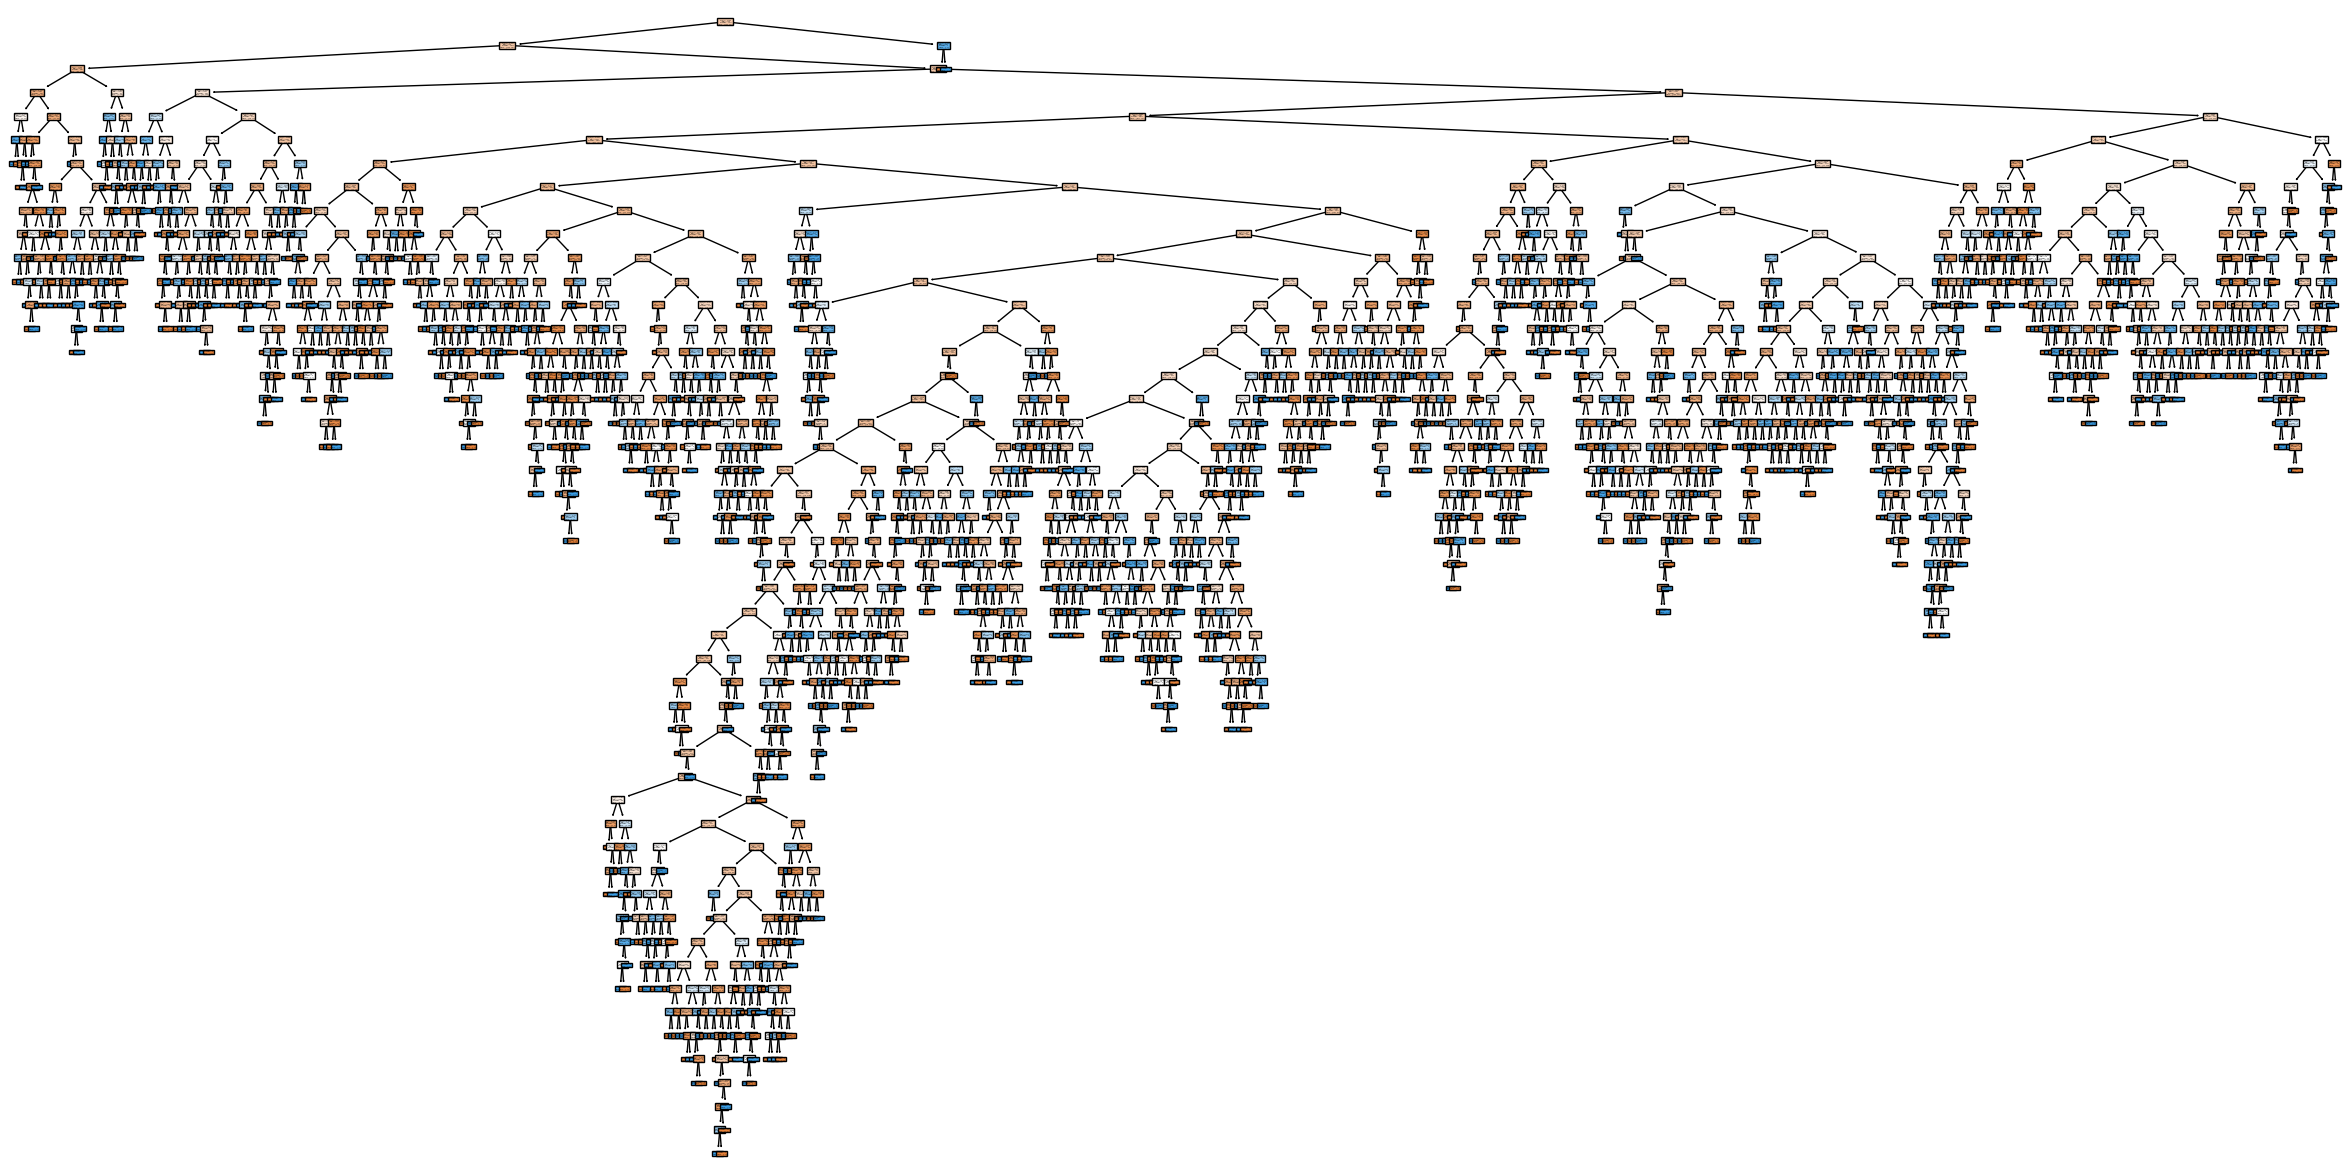

In [125]:
from sklearn import tree
plt.figure(figsize=(30,15))
tree.plot_tree(tree_model,filled=True)

In [126]:
y1_pred = tree_model.predict(X_test)

In [127]:
score = accuracy_score(y_test,y1_pred)
score

0.5521962350256703

## CONCLUSION OF HEART DISEASE PREDICTION
THE ACCURACY SCORE WE GOT USING LOGISTIC REGRESSION IS - 64.17%

THE ACCURACY SCORE WE GOT USING DECISION TREE IS - 55.21%